In [3]:
import IPython

# if input image is in range 0..1, please first multiply img by 255
# assume image is ndarray of shape [height, width, channels] where channels can be 1, 3 or 4
def imshow(img):
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

In [13]:
import cv2

from detectron2.config import get_cfg
from detectron2.modeling import build_model
from detectron2 import model_zoo
from detectron2.checkpoint import DetectionCheckpointer

import torch

from types import MethodType

from modified_classes import ModifiedFastRCNNOutputLayers, ModifiedImageList

import os

os.listdir('assets/frcnn-20epochs'), os.listdir('assets/frcnn-50epochs'), os.listdir('assets/frcnn-100epochs')

(['frcnn-20epochs.pt_train_config.yaml',
  'frcnn-20epochs.pt.classes',
  'frcnn-20epochs.pt'],
 ['frcnn-50epochs.pt_train_config.yaml',
  'frcnn-50epochs.pt',
  'frcnn-50epochs.pt.classes'],
 ['frcnn-100epochs.pt_train_config.yaml',
  'frcnn-100epochs.pt.classes',
  'frcnn-100epochs.pt'])

In [16]:
def check_model(model_path):
    device = torch.device("cpu")

    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
    cfg.MODEL.ROI_HEADS.NMS_THRESH_TEST = 0.3
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
    cfg.MODEL.WEIGHTS = model_path

    model = build_model(cfg).to(device).eval()
    DetectionCheckpointer(model).load(cfg.MODEL.WEIGHTS)

    from detectron2.utils.visualizer import Visualizer

    img = cv2.imread('dataset/night/20201201_000505.jpg')

    while img.shape[0] > 1000:
        img = cv2.resize(img, (img.shape[0]//2, img.shape[1]//2), interpolation = cv2.INTER_AREA)
    while img.shape[0] < 500:
        img = cv2.resize(img, (img.shape[0]*2, img.shape[1]*2), interpolation = cv2.INTER_AREA)

    print(img.shape)
    outputs = model(torch.from_numpy(img).permute(2,0,1).unsqueeze(0).to(device))

    v = Visualizer(img[:, :, ::-1], {"thing_classes": ["crocodile"]},scale=0.5)

    # just pick the first of the instances since they are sorted in descending confidence level
    out = v.draw_instance_predictions(outputs[0]["instances"][0].to("cpu"))
    imshow(out.get_image()[:, :, ::-1])

(1008, 756, 3)


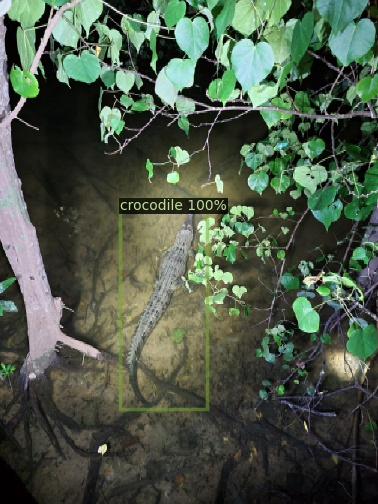

(1008, 756, 3)


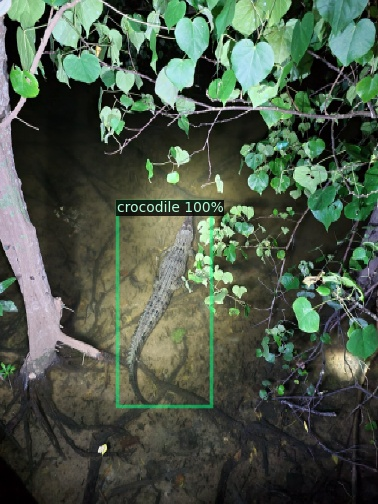

(1008, 756, 3)


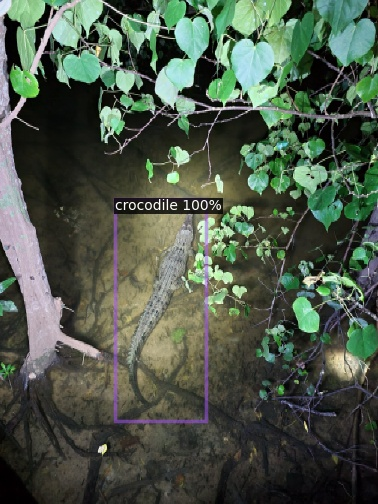

In [18]:
model_paths = ['assets/frcnn-20epochs/frcnn-20epochs.pt', 
               'assets/frcnn-50epochs/frcnn-50epochs.pt', 
               'assets/frcnn-100epochs/frcnn-100epochs.pt']

for model_path in model_paths:
    check_model(model_path)